based on https://journals.aps.org/pre/abstract/10.1103/PhysRevE.106.014140

In [162]:
import numpy as np
import matplotlib.pyplot as plt

C = 8.0/(3.0*np.pi)
def K(x):
    if (x**2) < 1:
        return (0.75)*( 1-(x**2) )
    else:
        return 0
    
# ktestX = np.linspace(-2,2,30)
# ktestY = [K(x) for x in ktestX]
# plt.plot(ktestX,ktestY)
    
    
def Kh2(x,t):
    global hx, ht, C
#     if (C/(hx*ht)) * K( np.linalg.norm([x/hx,t/ht],ord=2) ) == 0:
#         print((C/(hx*ht)),K( np.linalg.norm([x/hx,t/ht],ord=2)), np.linalg.norm([x/hx,t/ht]))
    return (C/(hx*ht)) * K( np.linalg.norm([x/hx,t/ht],ord=2) )

#T is a list of floats, X is a dictionary of float->float
#tj is the size of a time shift, xi is a point in feature space
def Mn(n,xi,tj):
    global Xlog,Tlog,lenT
    X = Xlog
    T = Tlog
    Num = 0
    Den = 0
    for k in range(lenT-1):
        for l in range(k+1,lenT):
            deltaT = (T[l]-T[k])
            kernel = (Kh2(xi-X[k],tj-deltaT) + Kh2(xi-X[k],tj+deltaT))
            Num += kernel*(X[l] - X[k])**n
            Den += kernel
    return Num/Den

def D(n,x,t):
    global tj
    return (1/(np.math.factorial(n)*tj))*Mn(n,x,tj)

d/dt X(t) = f(X,t) + g(X,t)Γ(t)

f(X,t) = D1(x,t)
g(X,t) = sqrt(2*D2(x,t))

In [2]:
def Γ(t):
    return np.random.default_rng().normal(0, 1, 1)[0]

def D1_real(x,t):
    return -x

def D2_real(x,t):
    return 1

def f_real(x,t):
    return D1_real(x,t)

def g_real(x,t):
    return np.sqrt(2*D2_real(x,t))

def X(x,t,dt):
    return x + (f_real(x,t) + g_real(x,t)*Γ(t))*dt

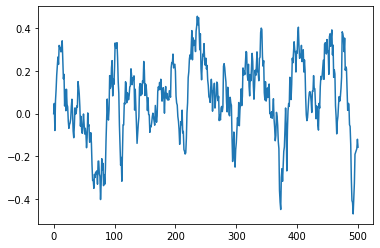

In [168]:
Xlog = [0]
Tlog = [0]

dt = 5*10e-3
lenT = 500

for t in range(lenT):
    Xlog.append(X(Xlog[-1], t*dt, dt))
    Tlog.append(Tlog[-1]+dt)
    
plt.plot(Xlog)
# plt.plot(Tlog)

In [169]:
from statistics import stdev
# s = stdev(data)
# h = 1.06*s*(len(data)**(-1/5))

fdg = 15

hx = (1.06*stdev(Xlog)*(lenT**(-1/5)))*fdg
ht = (1.06*stdev(Tlog)*(lenT**(-1/5)))*fdg/8
tj = dt*4


testX = np.linspace(-2,2,30)

Dfit = {1:[],2:[]}
for n in [1,2]:
    for x in testX:
        print(x,end="\r")
        Dfit[n].append(D(n,x,None))
print("done")

/tmp/ipykernel_17682/4211747880.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return Num/Den


done2068965517241755


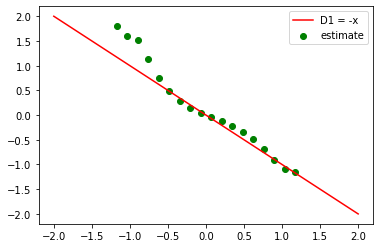

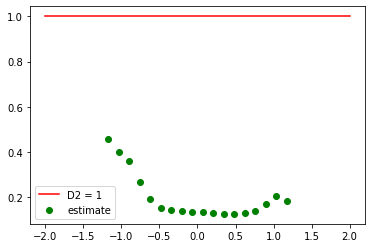

In [170]:
plt.plot(testX,[D1_real(x,None) for x in testX],color="r",label="D1 = -x")
plt.scatter(testX,Dfit[1],color="green",label="estimate")
plt.legend()
plt.show()
plt.plot(testX,[D2_real(x,None) for x in testX],color="r",label="D2 = 1")
plt.scatter(testX,Dfit[2],color="green",label="estimate")
plt.legend()
plt.show()

/tmp/ipykernel_17682/4211747880.py:36: RuntimeWarning: invalid value encountered in double_scalars
  return Num/Den


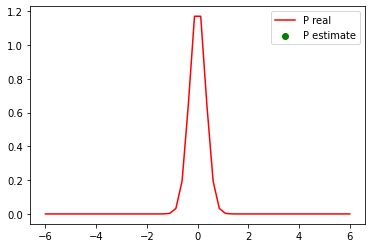

In [142]:
def P_fit(x,t,dt,xp):
    #t is unused because estimation method assumes D(x,n)
    return (1/(2*np.sqrt(np.pi*D(xp,2,t)*dt)))*np.exp(-((x-xp-D(xp,1,t)*dt)**2/(4*D(xp,2,t)*dt)))

def P_real(x,t,dt,xp):
    #t is unused because estimation method assumes D(x,n)
    return (1/(2*np.sqrt(np.pi*D2_real(xp,t)*dt)))*np.exp(-((x-xp-D1_real(xp,t)*dt)**2/(4*D2_real(xp,t)*dt)))

xp = 0 #prior x value (sharp? mean?)

testX = np.linspace(-6,6,50)

plt.plot(testX,[P_real(x,None,dt,xp) for x in testX],color="r",label="P real")
plt.scatter(testX,[P_fit(x,None,dt,xp) for x in testX],color="green",label="P estimate")
plt.legend()
plt.show()

In [ ]:
def norm(x,mu,sigma):
    return (1/np.sqrt(2*np.pi*sigma**2)) * np.exp( -((x-mu)**2 / (2*sigma**2)) )

def Qd(x,Qx,Qy):
    return sum([Qy[center]*norm(x,center,1)*dx for center in Qx])

r = 10
dx = 1

Qx = list(np.linspace(-r,r,int(1/dx)*2*r+1))
Qy = {x: 0 if x != 0 else 1 for x in Qx}

print(sum(Qy.values()))
plt.plot(Qy.keys(),Qy.values())
# plt.show()
for update in range(3):
    Qy = {x:Qd(x,Qx,Qy) for x in Qx}
    print(sum(Qy.values()))
    plt.plot(Qy.keys(),Qy.values())
plt.show()